# Plasmid RefSeq 203 database
###  Cedric Chauve, July 2020

In this notebook, we extract accessions ids for plasmids from the version 203 of RefSeq, with the aim to generate a new database for the HyAsP plasmid assembly tool.

In [1]:
from Bio import SeqIO
import csv
import matplotlib.pyplot as plt

The GenBank (*.gbff*) files for RefSeq 203 were downloadad on July 27, 2020, from ftp://ftp.ncbi.nlm.nih.gov/refseq/release/plasmid/.
The file *plasmid.RefSeq_203.genomic.txt* contains the accession, description and length of all RefSeq 203 plasmids.

The file *41467_2020_17278_MOESM8_ESM_filtered_accession.txt* provides all the accession ids of the plasmids (taken from RefSeq 84, November 2017) used in the paper "Pathways for horizontal gene transfer in bacteria revealed by a global map of their plasmids" (https://www.nature.com/articles/s41467-020-17278-2). The file *41467_2020_17278_MOESM8_ESM_filtered_accession.txt_blacklist* contains the entries that were filtered as being partial plasmids, chromosomal elements and PacBio internal control sequences.

In [2]:
# Files
REFSEQ84_FILE_ALL   = '41467_2020_17278_MOESM8_ESM.csv'
REFSEQ84_FILE_KEPT  = '41467_2020_17278_MOESM8_ESM_filtered_accession.txt'
REFSEQ84_FILE_DISC  = '41467_2020_17278_MOESM8_ESM_filtered_accession.txt_blacklist'
REFSEQ203_FILE_GB   = 'plasmid.RefSeq_203.genomic.gbff'
REFSEQ203_FILE_ALL  = 'plasmid.RefSeq_203.genomic.txt'
REFSEQ203_FILE_KEPT = 'plasmid.RefSeq_203_accession.txt'
REFSEQ203_FILE_DISC = 'plasmid.RefSeq_203_accession.txt_blacklist'

REFSEQ84_FILE_ALL_TODO  = True
REFSEQ203_FILE_ALL_TODO = False

In [3]:
# Creating the 41467_2020_17278_MOESM8_ESM_filtered_accession.txt* files

REFSEQ84_KEPT = open(REFSEQ84_FILE_KEPT,'w')
REFSEQ84_DISC = open(REFSEQ84_FILE_DISC,'w')

if REFSEQ84_FILE_ALL_TODO == True:
    with open(REFSEQ84_FILE_ALL, newline='') as csvfile:
        csv_data = csv.reader(csvfile, delimiter=',')
        for entry in csv_data:
            accession   = entry[0]
            blacklisted = entry[20]
            if blacklisted == 'No':
                REFSEQ84_KEPT.write(accession+'\n')
            else:
                REFSEQ84_DISC.write(accession+'\n')
REFSEQ84_KEPT.close()
REFSEQ84_DISC.close()

In [4]:
# Creating plasmid.RefSeq_203.genomic.txt

if REFSEQ203_FILE_ALL_TODO == True:
    IN_FILE  = REFSEQ203_FILE_GB
    OUT_FILE = REFSEQ203_FILE_ALL
    for gb_record in SeqIO.parse(open(IN_FILE,'r'), 'genbank') :
        OUT_FILE.write('%s\t%s\t%d\n' % (gb_record.id, gb_record.description, len(gb_record.seq)))

In [5]:
def remove_version(accession):
    return(accession.rstrip().split('.')[0])

In [6]:
# Reading the RefSeq 84 accession ids
REFSEQ84_DATA_ALL  = {}
REFSEQ84_KEPT = open(REFSEQ84_FILE_KEPT,'r').readlines()
for accession in REFSEQ84_KEPT:
    REFSEQ84_DATA_ALL[remove_version(accession)] = {'version':accession.rstrip(),'description':None,'length':None,'blacklist':False}
REFSEQ84_DISC = open(REFSEQ84_FILE_DISC,'r').readlines()
for accession in REFSEQ84_DISC:
    REFSEQ84_DATA_ALL[remove_version(accession)] = {'version':accession.rstrip(),'description':None,'length':None,'blacklist':True}

# Reading the RefSeq 203 data
REFSEQ203_DATA_ALL  = {}
REFSEQ203_ALL = open(REFSEQ203_FILE_ALL,'r').readlines()
for refseq203_data in REFSEQ203_ALL:
    (accession,description,length) = refseq203_data.rstrip().split('\t')
    REFSEQ203_DATA_ALL[remove_version(accession)] = {'version':accession.rstrip(),'description':description,'length':int(length),'blacklist':None}

# Join the two data sets
REFSEQ_JOINT_DATA_ALL = {}
for refseq203_accession in REFSEQ203_DATA_ALL.keys():
    REFSEQ_JOINT_DATA_ALL[refseq203_accession] = {'version203':None,'version84':None,'description203':None,'length203':None,'blacklist203':None,'blacklist84':None}
for refseq84_accession in REFSEQ84_DATA_ALL.keys():
    REFSEQ_JOINT_DATA_ALL[refseq84_accession] = {'version203':None,'version84':None,'description203':None,'length203':None,'blacklist203':None,'blacklist84':None}
for refseq203_accession in REFSEQ203_DATA_ALL.keys():
    data = REFSEQ203_DATA_ALL[refseq203_accession]
    REFSEQ_JOINT_DATA_ALL[refseq203_accession]['version203']     = data['version']
    REFSEQ_JOINT_DATA_ALL[refseq203_accession]['description203'] = data['description']
    REFSEQ_JOINT_DATA_ALL[refseq203_accession]['length203']      = data['length']
for refseq84_accession in REFSEQ84_DATA_ALL.keys():
    data = REFSEQ84_DATA_ALL[refseq84_accession]
    REFSEQ_JOINT_DATA_ALL[refseq84_accession]['version84']   = data['version']
    REFSEQ_JOINT_DATA_ALL[refseq84_accession]['blacklist84'] = data['blacklist']

In [7]:
# Checking filtered entries in RefSeq 84
REFSEQ203_FILE_DISC84 = 'plasmid.RefSeq_203_filtered_in_84.txt'
REFSEQ203_DISC84      = open(REFSEQ203_FILE_DISC84,'w')
for accession in REFSEQ_JOINT_DATA_ALL.keys():
    if REFSEQ_JOINT_DATA_ALL[accession]['blacklist84'] == True:
        REFSEQ203_DISC84.write(accession+'\t'+str(REFSEQ_JOINT_DATA_ALL[accession]['version84'])+'\t'+str(REFSEQ_JOINT_DATA_ALL[accession]['version203'])+'\t'+str(REFSEQ_JOINT_DATA_ALL[accession]['description203'])+'\n')

It looks, from looking at the file *plasmid.RefSeq_203_filtered_in_84.txt* that very few of the filtered sequences in RefSeq 84 were characterized by the occurrences of 'plasmid' and 'complete sequence' and that most of them (1/25) were unnamed. So to filter the entries of RefSeq 203, we discard any entry that does not contains 'plasmid' and 'complete sequence' or contains 'unnamed'.

In [8]:
# Filtering RefSeq 203

for accession in REFSEQ_JOINT_DATA_ALL.keys():
    description203 = REFSEQ_JOINT_DATA_ALL[accession]['description203']
    if (description203 != None) and (((not 'plasmid' in description203) and (not 'complete sequence' in description203)) or ('unnamed' in description203)):
        REFSEQ_JOINT_DATA_ALL[accession]['blacklist203'] = True
    else:
        REFSEQ_JOINT_DATA_ALL[accession]['blacklist203'] = False

In [9]:
# Which entries from RefSeq 84 are not in RefSeq 203
REFSEQ_84_NOT_IN_203 = []
for accession in REFSEQ_JOINT_DATA_ALL.keys():
    if (REFSEQ_JOINT_DATA_ALL[accession]['version203'] == None):
        REFSEQ_84_NOT_IN_203.append(accession)
        
print('There are '+str(len(REFSEQ_84_NOT_IN_203))+' entries in RefSeq 84 that are not in RefSeq 203.')

REFSEQ84_NOT_IN_203_FILE = 'plasmid.RefSeq_84_not_in_203.txt'
REFSEQ84_NOT_IN_203      = open(REFSEQ84_NOT_IN_203_FILE,'w')
for accession in REFSEQ_84_NOT_IN_203:
    REFSEQ84_NOT_IN_203.write(accession+'\n')
REFSEQ84_NOT_IN_203.close()

There are 210 entries in RefSeq 84 that are not in RefSeq 203.


Out of these 208 entries, 185 were removed by RefSeq staff. From now on we will then discard all these entries that despite being in the RefSeq 84 kept entries are not anymore in the RefSeq 203 plasmids data.

In [10]:
# Which entries are filtered or not in RefSeq 203

REFSEQ203_KEPT_NB,REFSEQ84_KEPT_NB = 0,0
REFSEQ203_DISC_NB,REFSEQ84_DISC_NB = 0,0
for accession in REFSEQ_JOINT_DATA_ALL.keys():
    if REFSEQ_JOINT_DATA_ALL[accession]['version203'] != None:
        if REFSEQ_JOINT_DATA_ALL[accession]['blacklist203'] == True:
            REFSEQ203_DISC_NB += 1
        else:
            REFSEQ203_KEPT_NB +=1
    if REFSEQ_JOINT_DATA_ALL[accession]['version84'] != None:
        if REFSEQ_JOINT_DATA_ALL[accession]['blacklist84'] == True:
            REFSEQ84_DISC_NB += 1
        else:
            REFSEQ84_KEPT_NB +=1
        
print('In RefSeq 84, there were '+str(REFSEQ84_KEPT_NB)+' kept entries and '+str(REFSEQ84_DISC_NB)+' blacklisted entries.')
print('In RefSeq 203, there are '+str(REFSEQ203_KEPT_NB)+' kept entries and '+str(REFSEQ203_DISC_NB)+' blacklisted entries.')

In RefSeq 84, there were 9894 kept entries and 742 blacklisted entries.
In RefSeq 203, there are 19917 kept entries and 6990 blacklisted entries.


We now look at the length distribution of the kept plasmids in both releases of RefSeq.

In [11]:
# Length distribution of the kept entries
REFSEQ84_KEPT_LG = [REFSEQ_JOINT_DATA_ALL[accession]['length203'] for accession in REFSEQ_JOINT_DATA_ALL.keys() 
                    if REFSEQ_JOINT_DATA_ALL[accession]['version203']!=None and REFSEQ_JOINT_DATA_ALL[accession]['version84']!=None and REFSEQ_JOINT_DATA_ALL[accession]['blacklist84']==False]
REFSEQ203_KEPT_LG = [REFSEQ_JOINT_DATA_ALL[accession]['length203'] for accession in REFSEQ_JOINT_DATA_ALL.keys() 
                     if REFSEQ_JOINT_DATA_ALL[accession]['version203']!=None and REFSEQ_JOINT_DATA_ALL[accession]['blacklist203']==False]

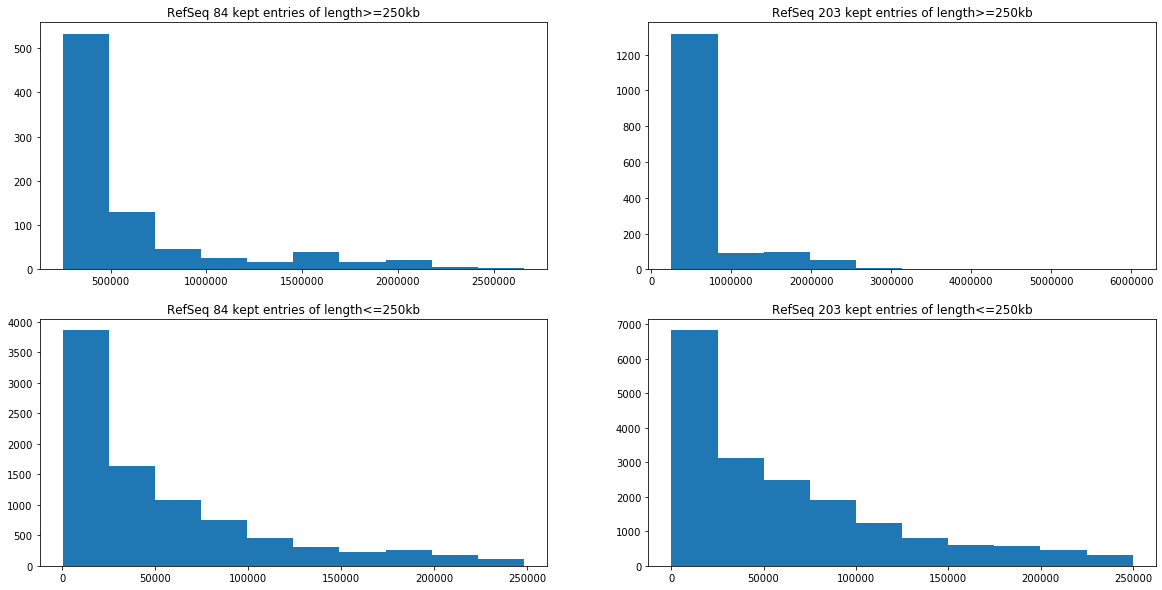

In [12]:
plt.figure(figsize=(20,10))
MIN_LG_AUX = 250000
plt.subplot(221)
plt.hist([l for l in REFSEQ84_KEPT_LG if l>=MIN_LG_AUX])
plt.title('RefSeq 84 kept entries of length>=250kb')
plt.subplot(222)
plt.hist([l for l in REFSEQ203_KEPT_LG if l>=MIN_LG_AUX])
plt.title('RefSeq 203 kept entries of length>=250kb')
MAX_LG_AUX = 250000
plt.subplot(223)
plt.hist([l for l in REFSEQ84_KEPT_LG if l<=MAX_LG_AUX])
plt.title('RefSeq 84 kept entries of length<=250kb')
plt.subplot(224)
plt.hist([l for l in REFSEQ203_KEPT_LG if l<=MAX_LG_AUX])
plt.title('RefSeq 203 kept entries of length<=250kb')
plt.show()

I only see as suspicious the presence of a few very long plasmids, including one very long plasmid of length >6Mb (NZ_AP022593.1, Mycolicibacterium arabiense strain JCM 18538 plasmid pJCM18538, complete sequence), that we remove.

In [13]:
[(REFSEQ_JOINT_DATA_ALL[accession]['version203'],REFSEQ_JOINT_DATA_ALL[accession]['length203']) for accession in REFSEQ_JOINT_DATA_ALL.keys() 
 if REFSEQ_JOINT_DATA_ALL[accession]['version203']!=None and 
 REFSEQ_JOINT_DATA_ALL[accession]['blacklist203']==False and
 REFSEQ_JOINT_DATA_ALL[accession]['length203']>=2500000]

[('NC_007974.2', 2580084),
 ('NZ_LR135270.1', 2697633),
 ('NZ_CP032695.1', 2584926),
 ('NZ_AP022593.1', 6017160),
 ('NZ_LT984814.1', 2848964),
 ('NZ_LT991977.1', 2827766),
 ('NZ_LT984807.1', 2796980),
 ('NZ_LT984802.1', 2595033),
 ('NZ_LT984804.1', 2795658),
 ('NZ_LN868939.1', 2657929)]

In [14]:
REFSEQ_JOINT_DATA_ALL['NZ_AP022593']['blacklist203']=True

In [15]:
# Generating the RefSeq 203 accession file

REFSEQ203_KEPT = open(REFSEQ203_FILE_KEPT,'w')
REFSEQ203_DISC = open(REFSEQ203_FILE_DISC,'w')

for accession in REFSEQ_JOINT_DATA_ALL.keys():
    if REFSEQ_JOINT_DATA_ALL[accession]['version203']!=None:
        if REFSEQ_JOINT_DATA_ALL[accession]['blacklist203'] == False:
            REFSEQ203_KEPT.write(REFSEQ_JOINT_DATA_ALL[accession]['version203']+'\n')
        else:
            REFSEQ203_DISC.write(REFSEQ_JOINT_DATA_ALL[accession]['version203']+'\n')  
REFSEQ203_KEPT.close()
REFSEQ203_DISC.close()

In [16]:
# Last, we filter the kept RefSeq 203 entries to have only the ones from E. faecalis

REFSEQ203_FAECALIS_FILE_KEPT = 'plasmid.RefSeq_203_Efaecalis_accession.txt'
REFSEQ203_FAECALIS_FILE_DISC = 'plasmid.RefSeq_203_Efaecalis_accession.txt_blacklist'

REFSEQ203_FAECALIS_KEPT = open(REFSEQ203_FAECALIS_FILE_KEPT,'w')
REFSEQ203_FAECALIS_DISC = open(REFSEQ203_FAECALIS_FILE_DISC,'w')

for accession in REFSEQ_JOINT_DATA_ALL.keys():
    if REFSEQ_JOINT_DATA_ALL[accession]['version203']!=None and 'faecalis' in REFSEQ_JOINT_DATA_ALL[accession]['description203']:
        if REFSEQ_JOINT_DATA_ALL[accession]['blacklist203'] == False:
            REFSEQ203_FAECALIS_KEPT.write(REFSEQ_JOINT_DATA_ALL[accession]['version203']+'\n')
        else:
            REFSEQ203_FAECALIS_DISC.write(REFSEQ_JOINT_DATA_ALL[accession]['version203']+'\n')  
REFSEQ203_FAECALIS_KEPT.close()
REFSEQ203_FAECALIS_DISC.close()